- Perceptron

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [4]:
iris = load_iris()
X = iris.data[:,(2,3)] # 꽃잎의 길이와 너비
y = (iris.target == 0).astype(np.int) # 부채붓꽃(Iris Setosa) 인가?

In [5]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


### 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

- 케라스를 사용하여 데이터셋 적재하기

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
# 위의 데이터셋은 이미 훈련 세트와 테스트 세트로 나뉘어져 있으나 검증세트는 없다.
# 아래에서 검증세트를 만들고 0~255.0의 스케일을 0~1의 스케일로 조정한다.
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [13]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
class_names[y_train[0]]

'Coat'

- 시퀀셜 API를 사용하여 모델 만들기

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
# 층을 하나씩 추가하지 않고 Sequential 모델을 만들 때 층의 리스트를 전달할 수 있다.
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28,28]),
#     keras.layers.Dense(300, activation="relu"),
#     keras.layers.Dense(100, activation="relu"),
#     keras.layers.Dense(10, activation="softmax")
# ])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.layers

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [21]:
model.get_layer('dense') is hidden1

True

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
weights

array([[ 0.05547993,  0.05214083,  0.07091218, ...,  0.00311887,
         0.04310589, -0.0595003 ],
       [ 0.06471929,  0.00524817, -0.03934347, ..., -0.01626013,
        -0.010014  ,  0.03162093],
       [-0.01182352,  0.04586427, -0.06205386, ...,  0.06634349,
        -0.02201322,  0.0255328 ],
       ...,
       [-0.02005766, -0.04046973, -0.01322572, ..., -0.01730546,
         0.00551988, -0.0357935 ],
       [-0.05789125, -0.03254052,  0.04757885, ..., -0.03639441,
         0.003304  ,  0.00474163],
       [ 0.07364273,  0.02579983, -0.02847961, ..., -0.01376585,
         0.0614403 ,  0.04797439]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7227 - accuracy: 0.7629 - val_loss: 0.5280 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4882 - accuracy: 0.8308 - val_loss: 0.4355 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4432 - accuracy: 0.8453 - val_loss: 0.4254 - val_accuracy: 0.8550
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4161 - accuracy: 0.8531 - val_loss: 0.4141 - val_accuracy: 0.8556
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3970 - accuracy: 0.8619 - val_loss: 0.3856 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3804 - accuracy: 0.8654 - val_loss: 0.3749 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3679 - accuracy: 0.8703 - val_loss: 0.3594 - val_accuracy:

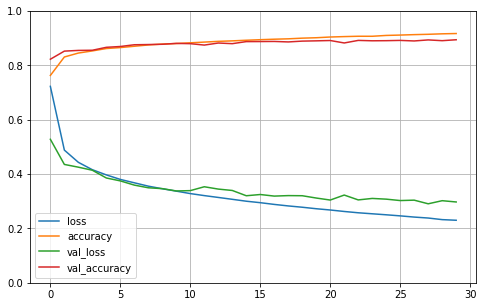

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
# 테스트 세트로 모델 평가
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.8822


[0.32920360565185547, 0.8822000026702881]

- 모델을 사용해 예측을 만들기

In [31]:
X_new = X_test[:3] # 여기서는 실제로 새로운 샘플이 없기 때문에 테스트 세트의 앞부분을 사용한다.

In [32]:
y_proba = model.predict(X_new)

In [33]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [35]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [40]:
model = keras.models.Sequential([keras.layers.Dense(30,activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]  # 새로운 샘플이라고 생각합니다.
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9736 - val_loss: 0.5171
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4954 - val_loss: 0.4435
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4472 - val_loss: 0.4069
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4264 - val_loss: 0.3944
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4377 - val_loss: 0.3869
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4078 - val_loss: 0.3766
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3976 - val_loss: 0.3693
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3920 - val_loss: 0.3650
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3861 - val_loss: 0.3605
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3820 - val_loss: 0.3584

In [41]:
y_pred

array([[3.507694 ],
       [1.9822482],
       [2.0674706]], dtype=float32)

### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

In [43]:
# 와이드 & 딥 신경망 만들기
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [48]:
# 5개의 특성은 짧은 경로로 보내고 6개의 특성은 깊은 경로로 보내는 신경망
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [53]:
# X_train을 전달할 때 (X_train_A, X_train_B) 와 같이 항상 튜플로 전달해야 한다.
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4193 - val_loss: 0.4046
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4186 - val_loss: 0.4042
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4177 - val_loss: 0.4032
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4168 - val_loss: 0.4021
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4158 - val_loss: 0.4015
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4153 - val_loss: 0.4009
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4143 - val_loss: 0.4012
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4136 - val_loss: 0.3984
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4127 - val_loss: 0.3976
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4120 - val_loss: 0.3984

In [55]:
# 여러개의 출력 다루기
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat) # 출력층까지는 이전과 동일
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [56]:
# 각 출력은 각자의 손실 함수가 필요(하나의 손실을 전달하면 케라스가 모든 출력의 손실 함수가 동일하다고 가정함)
# 각 출력은 훈련에 사용되는데 이 때 각 출력에 가중치를 부여할 수 있음
model.compile(loss=["mse","mse"], loss_weights=[0.9,0.1], optimizer="sgd")

In [57]:
# 각 출력에 대한 레이블을 제공
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3876 - main_output_loss: 1.2598 - aux_output_loss: 2.5380 - val_loss: 0.6342 - val_main_output_loss: 0.5375 - val_aux_output_loss: 1.5048
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6002 - main_output_loss: 0.5146 - aux_output_loss: 1.3703 - val_loss: 0.5325 - val_main_output_loss: 0.4573 - val_aux_output_loss: 1.2091
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5334 - main_output_loss: 0.4654 - aux_output_loss: 1.1454 - val_loss: 0.4968 - val_main_output_loss: 0.4352 - val_aux_output_loss: 1.0515
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4963 - main_output_loss: 0.4394 - aux_output_loss: 1.0082 - val_loss: 0.4603 - val_main_output_loss: 0.4079 - val_aux_output_loss: 0.9319
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4692 - main_output_loss: 0.4219 - aux_output_loss: 0.8947 - val_loss

In [60]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B],[y_test,y_test])
# print("total_loss : %.4f, main_loss : %.4f, aux_loss : %.4f"%(total_loss, main_loss, aux_loss))

162/162 [==============================] - 0s 1ms/step - loss: 0.3685 - main_output_loss: 0.3513 - aux_output_loss: 0.5234


In [62]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])